<h1>Содержание<span class="tocSkip"></span></h1>
<br>
<div class="toc">
    <ul class="toc-item">
        <li>
            <span>
                <a href="#1-Подготовка-окружения">
                    <span class="toc-item-num">1&nbsp;&nbsp;</span>
                    Подготовка окружения
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#2-Подготовка-данных">
                    <span class="toc-item-num">2&nbsp;&nbsp;</span>
                    Подготовка данных
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#3-Обучение-модели">
                    <span class="toc-item-num">3&nbsp;&nbsp;</span>
                    Обучение модели
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#4-Общий-вывод">
                    <span class="toc-item-num">4&nbsp;&nbsp;</span>
                    Общий вывод
                </a>
            </span>
        </li>
    </ul>
</div>

# Лабораторная работа №3: RandomForest 

**Задача:** построить графики зависимости предсказаний метрики от значения параметров (количество деревьев и максимальная глубина) ансамблевого метода `RandomForestClassifier`.

**Источник данных:** датасет `sklearn.make_classification` (многоклассовая классификация).

<div style="background-color: blue; height: 2px; margin: 10px 0;"></div>

## 1 Подготовка окружения

Импорт библиотек:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm
from typing import Tuple

import random

import sklearn
from sklearn import datasets

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

<div style="background-color: blue; height: 2px; margin: 10px 0;"></div>

## 2 Подготовка данных

Задание функции выведения одного экземпляра набора данных:

In [2]:
def print_single_element(features: np.ndarray, target: np.ndarray) -> None:
    random_id = random.choice(range(len(features)))
    
    features = features[random_id]
    target = target[random_id]
    
    print(f'Признаки:\n{features}\n')
    print(f'Целевой признак: {target}\n')

---

Задание признаков и целевого признака:

In [3]:
features, target = make_classification(
    n_samples=1000, 
    n_features=10,
    n_informative=7,
    n_classes=6
)

Выведение на экран одного экземпляра признаков и целевого признака:

In [4]:
print_single_element(features, target)

Признаки:
[ 0.39922492 -0.70592041 -0.37199186  3.21478957  2.02610948  2.96312825
 -1.51645566 -0.6892114   2.15197741 -0.44857062]

Целевой признак: 1



Выведение на экран соотношения классов в целевом признаке:

In [5]:
pd.Series(target).value_counts()

4    168
3    167
5    167
1    167
0    167
2    164
Name: count, dtype: int64

Формирование тренировочной и валидационной выборок:

In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(features, target, test_size=0.25)

Выведение на экран тренировочной и валидационной выборок:

In [7]:
print('Размерность тренировочной выборки:', X_train.shape)
print('Размерность валидационной выборки:', X_valid.shape)

Размерность тренировочной выборки: (750, 10)
Размерность валидационной выборки: (250, 10)


<div style="background-color: blue; height: 2px; margin: 10px 0;"></div>

## 3 Обучение модели

Задание функции обучения модели:

In [8]:
def train_model(param: dict,
                X_train: np.ndarray,
                y_train: np.ndarray,
                X_valid: np.ndarray,
                y_valid: np.ndarray) -> Tuple[np.array, str]:
    
    scores = []
    param_name = list(param.keys())[0]
    param_value = list(param.values())[0]
    
    for i in tqdm(param_value, 'Training process'):
        param = {param_name: i}
        
        model = RandomForestClassifier(**param, criterion = 'entropy')
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_valid)
        score = accuracy_score(y_valid, y_pred)
        
        scores.append([score, i])
        
    return np.array(scores), param_name

Задание функции построения графика зависимости метрики от параметра модели:

In [9]:
def plot_score_param(scores: np.array, param_name: str) -> None:
    font_s = 10
    plt.figure(figsize=(6,5))
    
    plt.title(f'Зависимость предсказаний от параметра {param_name}\n', fontsize=font_s+2)
    
    plt.plot(scores[:, 1], scores[:, 0])
    
    plt.xlabel(f'{param_name}', fontsize=font_s)
    plt.ylabel('score', fontsize=font_s)
    
    plt.grid()
    plt.show()

---

**Параметр `n_estimators`**

Выведение на экран графика зависимости матрики от параметра:

Training process:   0%|          | 0/49 [00:00<?, ?it/s]

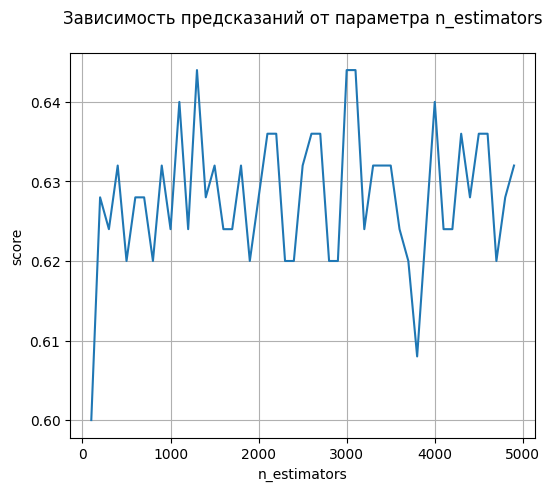

In [10]:
plot_score_param(
    *train_model(
        {'n_estimators': range(100, 5000, 100)},
         X_train, y_train, X_valid, y_valid
    )
)

>Чем больше количество деревьев, тем выше качество обучения.

---

**Параметр `max_depth`**

Выведение на экран графика зависимости метрики от параметра:

Training process:   0%|          | 0/29 [00:00<?, ?it/s]

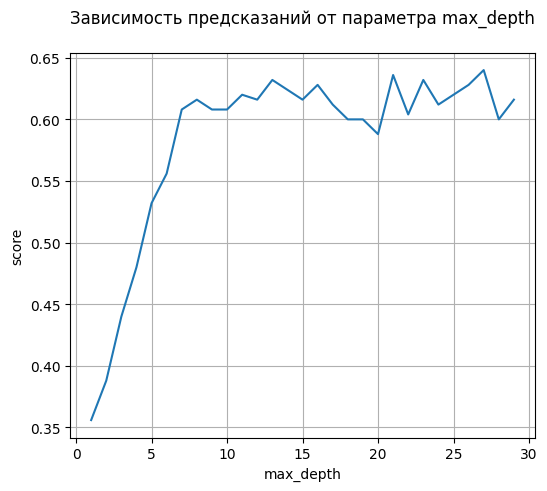

In [11]:
plot_score_param(
    *train_model(
        {'max_depth': range(1, 30)},
         X_train, y_train, X_valid, y_valid
    )
)

>Чем глубже деревья, тем лучше качество обучения.

<div style="background-color: blue; height: 2px; margin: 10px 0;"></div>

## 4 Общий вывод

Была продемонстрирована зависимость значения метрики на валидационной выборке от значения параметров (количество деревьев и максимальная глубина) ансамблевого метода `RandomForestClassifier`.

<div style="text-align: center; font-size: 20px; padding: 15px 0;">
    <a href="#Содержание" data-toc-modified-id="Содержание" style="text-decoration: none; color: #296eaa; border: 2px dashed #296eaa; opacity: 0.8; border-radius: 3px; padding: 10px 80px;">
        В начало файла ↑
    </a>
</div>